out count:	734
in count:	1314
last estimate:	2.56640625


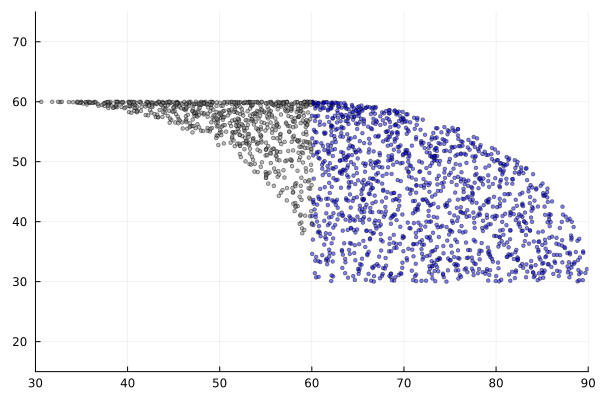

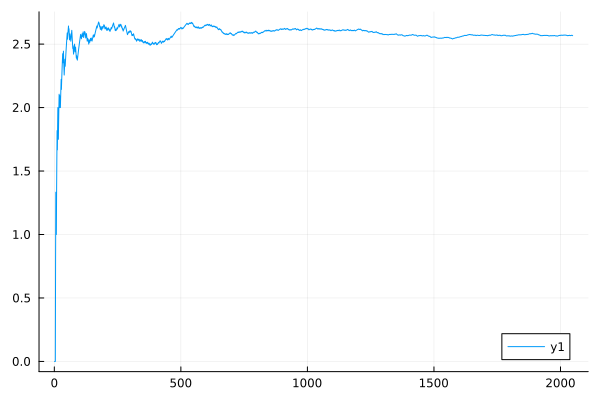

monte_carlo_π_main_tests (generic function with 1 method)

In [5]:
#=
Monte_Carlo_π
Kata
MIT license copyright Dr Keith S Reid 2023
Intent: dropped matchsticks model approximation of π

THIS DOES NOT WORK BECAUSE THE CLUSTERING OF POINTS IS NOT UNIFORM

=#

# s.0 Packages

using Plots
using Test

# s.1 Config

function get_repeats()
    repeats::UInt64 = 2048
    return repeats
end

function get_size_big_line()
    size::UInt64    = 60
    return size
end

function count_size_small_line(size_big_line)
    size::UInt64    = size_big_line / 2
    return size
end


# s.2 Structs

# s.3 Model

function build_big_line(size)
    big_line::Vector{Vector{Float64}} = [[size,0],[size,size]]
    return big_line
end

# s.4 View

function tell_repeats(repeats)
    println("This many repeats:\t", repeats)
end

# s.5 Control
function monte_carlo_π_main()
    
    repeats             = get_repeats()
    size_big_line       = get_size_big_line()    
    big_line            = build_big_line(size_big_line)
    mid_point           = [size_big_line,size_big_line/2]
    size_small_line     = count_size_small_line(size_big_line)
    π_graph             = plot(legend=:false, xlims=(0.5*size_big_line,1.5*size_big_line),
                                              ylims=(0.25*size_big_line,1.25*size_big_line)) # [size_big_line,size_big_line],[0,size_big_line], 
    out_count           = 0
    in_count            = 0
    estimates           = []
    
    for repeat in 1:repeats
        
        start_x::Float64    = mid_point[1] - (rand() * size_small_line)
        start_y::Float64    = mid_point[2] 
        small_start         = [start_x, start_y]
        
        degree              = rand()*90
        stop_right          = cosd(degree) * size_small_line # sine equals adjacent over hypoteneuse
        stop_up             = sind(degree) * size_small_line # sine equals opposite over hypoteneuse
        
        small_step          =   [stop_right, stop_up]
        small_stop          = .+(small_start, small_step)

        if small_stop[1] > size_big_line
            in_count += 1
            graph               = scatter!(π_graph, [small_stop[1]],     [small_stop[2]], 
                                    color = "blue", alpha=0.5, mark=2)
        else
            out_count += 1
            graph               = scatter!(π_graph, [small_stop[1]],     [small_stop[2]],
                                    color = "gray", alpha=0.5, mark=2)
        end
                                
        all_count               = out_count + in_count 
        πrr = implied_circle    = 4 * in_count 
        rr                      = all_count
        implied_π               = πrr / rr 
        push!(estimates, implied_π)
    end
    println("out count:\t", out_count)
    println("in count:\t", in_count)
    println("last estimate:\t", estimates[end])
    convergence_graph = plot([x[1] for x  in enumerate(estimates)],
                             [x[2] for x  in enumerate(estimates)])    
    display(π_graph)
    display(convergence_graph)
end

monte_carlo_π_main()
    
# s.6 Tests
    
function test_build_big_line()
    size_big_line   = 2 # get_size_big_line()
    big_line        = build_big_line(size_big_line)
    @test big_line  == [[size_big_line, 0],[size_big_line, size_big_line]]
    
    size_big_line   = 0 # get_size_big_line()
    big_line        = build_big_line(size_big_line)
    @test big_line    == [[size_big_line, 0],[size_big_line, size_big_line]]
    
    size_big_line   = 100 # get_size_big_line()
    big_line        = build_big_line(size_big_line)
    @test big_line       == [[size_big_line, 0],[size_big_line, size_big_line]]
    @test typeof(big_line) == Vector{Vector{Float64}}
    @test typeof(big_line[1]) == Vector{Float64}
    @test typeof(big_line[1][1]) == Float64
    
    println("passed build big line")
    
end

function monte_carlo_π_main_tests()
    test_build_big_line()
end

#monte_carlo_π_main_tests()
    
    

In [ ]:
#=

area of the quarter circle = π x r x r / 4
area of the implied circle = π x r x r

area of the quarter square =     r x r
area of the implied square =     r x r x 4

or with letters c and s 

  c   = πrr
  s   = rr4 
  c/s = π / 4
  π   = 4c/s 
  
=#